In [5]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np
import random
import time
import pandas as pd
import math
import csv
import os

t0=time.time()

def scan(cant,lista):
    i=0
    for x in lista:
        print(x)
        i+=1
        if i>cant:
            break
            
def Tiempo():
    t1=time.time()
    print("Esto tardó {} segundos".format(t1-t0))


def ldata(archive):
        f = open(archive)
        data = []
        for line in f:
            col = line.split("\t")
            col = [x.strip() for x in col]
            data.append(col)
        return data 
    
# Vamos a leer los archivos con esta celda
#--------------------------------------------------------------------------


# 

CarpCheck=[[root,files] for root,dirs,files in os.walk(".")]

# Los primero dos elementos de CarpCheck no les des bola, porque son
# la mismísma carpeta en la que estás y porque el segundo es ipynb checkpoints
# Eso es algo del notebook, no del TP.

Puntos = []

for x in CarpCheck[2:]:
    dada = x[0].split("\\")
    Puntos.append(dada[1])

# Con esto tengo los nombres de todas las carpetas que estoy usando
# Fijate que si cambias las carpetas esto cambia

CarpCheck=[[root,files] for root,dirs,files in os.walk(Puntos[0])]
Labarcm1 = CarpCheck[0][1]

CarpCheck=[[root,files] for root,dirs,files in os.walk(Puntos[1])]
Labarcm2a = CarpCheck[0][1]

# Con esto tengo los nombres de todos los archivos en todas las carpetas

Tiempo()

Esto tardó 0.018001317977905273 segundos


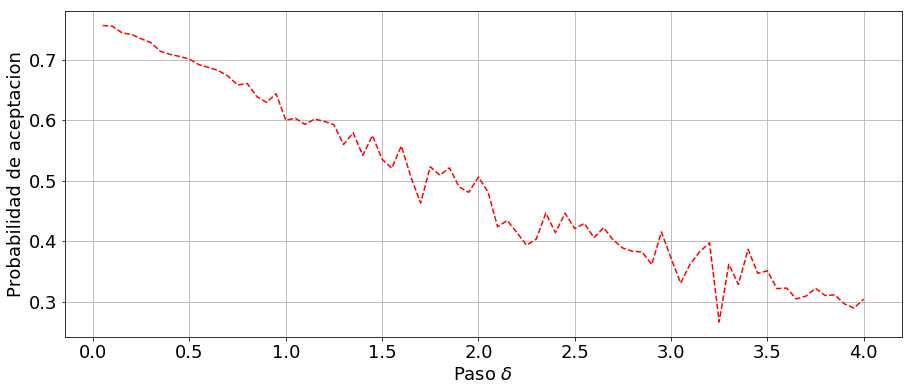

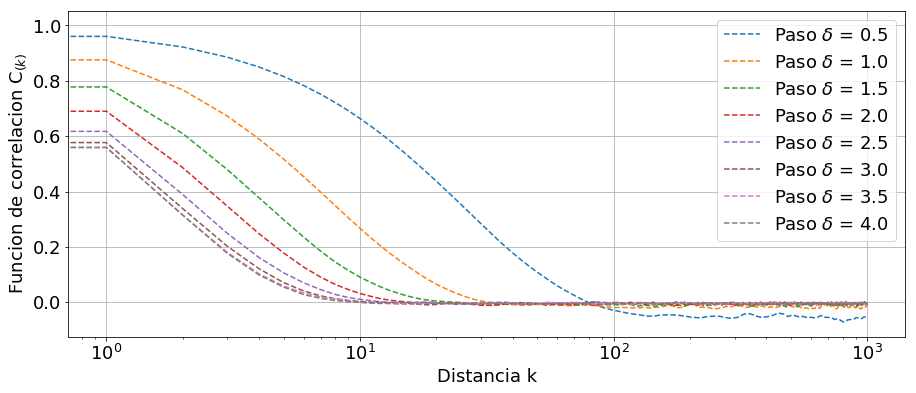

Esto tardó 190.16987705230713 segundos


In [3]:
# Acá vamos a hacer el punto 1a

t0=time.time()

# Vamos a calcular el porcentaje de aceptación en función del tamaño de Delta
# Ya fue, los de correlacion tienen 4500 puntos, no 5000. Igual sirve

Muestreos1 = []
Correlaciones1 = []

# Primero separemos los muestreos de las correlaciones
# Los archivos tienen la forma "Datos_(Correlacion/muestreo)_d=num.txt", con num siendo el valor de d.

for x in Labarcm1:
    dada=x.split("_")
    if dada[1]=="Correlacion":
        Correlaciones1.append(x)
    if dada[1]=="muestreo":
        Muestreos1.append(x)

# # Calculemos el porcentaje de aceptación. Este va a ser la cantidad de pasos distintos sobre
# # la cantidad de pasos totales.

PlotdXY=[[],[]]

for label in Muestreos1:
    # Lee el archivo con los valores de pc para cada dimensión
    Datos = ldata("Met1/{}".format(label))
    # Lo corrige para que Datos sea una lista con los valores de pc
    Datos = [float(x) for x in Datos[0][0:len(Datos[0])-1]]
    dada = label.split("=")
    dede = dada[1].strip(".txt")
    x = float(dede)
    y = len(set(Datos))/len(Datos)
    PlotdXY[0].append(x)
    PlotdXY[1].append(y)

plt.figure(figsize=(15,6))
plt.plot(PlotdXY[0],PlotdXY[1],"r--")
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.xlabel("Paso $\delta$")
plt.ylabel("Probabilidad de aceptacion")
# plt.title("Probabilidad de aceptacion en funcion del paso de exploracion")
# plt.legend()
plt.show()

#----------------------------------------------------------------------------------------

# Ahora viene el análisis de la correlacion
# Va a haber que hacer promedios. Hay que arremangarse

Dicprom = dict()

for label in Correlaciones1:
    # Lee el archivo con los valores de pc para cada dimensión
    Datos = ldata("Met1/{}".format(label))
    # Lo corrige para que Datos sea una lista con los valores de pc
    Datos2=[[] for j in range(len(Datos))]
    Datos2[0]=[x for x in Datos[0][0:len(Datos[0])-1]]
    dada = label.split("=")
    dede = dada[1].strip(".txt") # Este es el ancho del paso de aceptacion
    d = float(dede)
    Dicprom[d] = [[],[]]
    for j in range(1,len(Datos)):
        Datos2[j] = [float(x) for x in Datos[j][0:len(Datos[j])-1]]
    for j in range(1,len(Datos2[0])):
        A = []
        for m in range(1,len(Datos2)):
            A.append(Datos2[m][j])
        B = np.array(A)
        prom = np.mean(B)
        Dicprom[d][0].append(j-1)
        Dicprom[d][1].append(prom)

#------------------------------------------------------------------------
# Ahora me queda el gráfico de la correlación

plt.figure(figsize=(15,6))
A = np.arange(0.5,4.1,0.5)
for d in Dicprom.keys():
    if d in A:
        plt.semilogx(Dicprom[d][0],Dicprom[d][1],"--",label="Paso $\delta$ = {}".format(round(d,3)))
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.xlabel("Distancia k")
plt.ylabel("Funcion de correlacion C$_{(k)}$")
# plt.title("Funcion de correlacion en funcion de la distancia k")
plt.legend()
plt.show()


Tiempo()

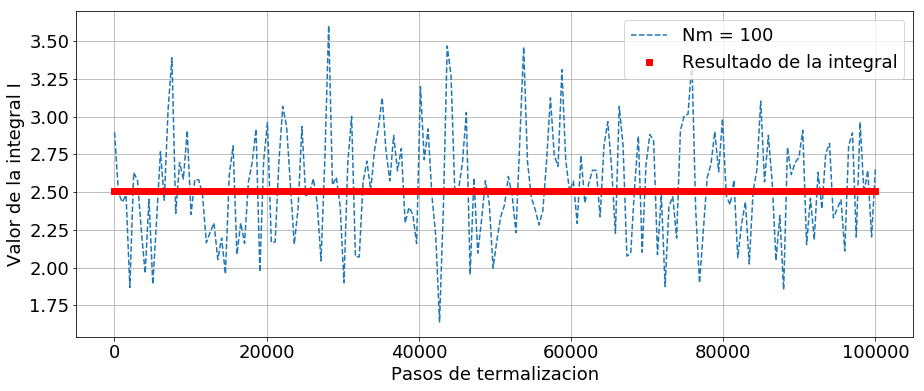

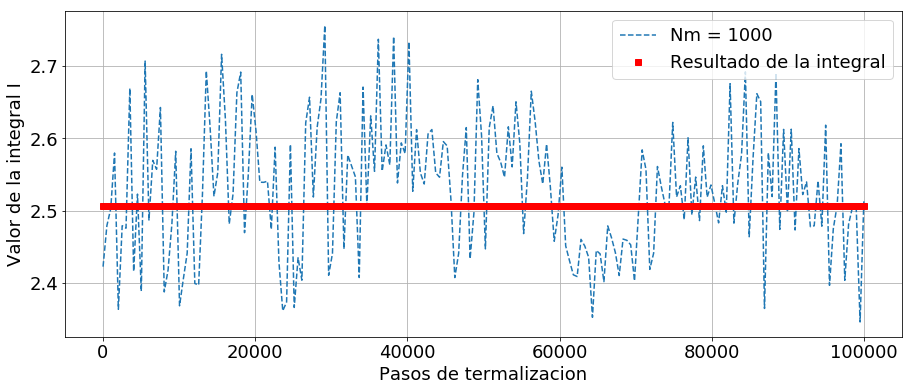

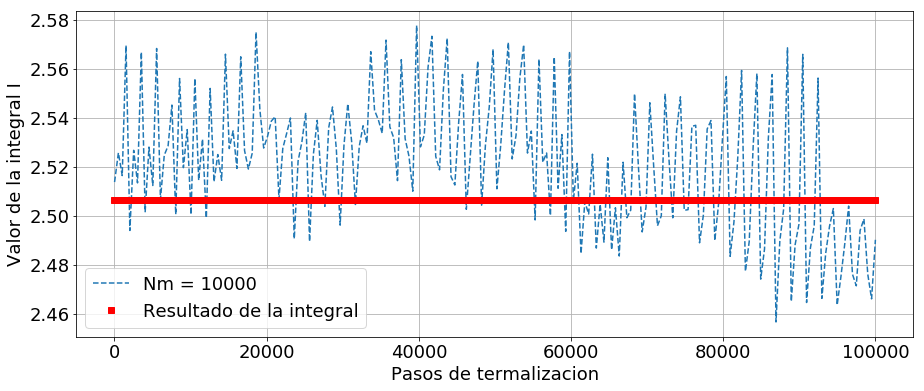

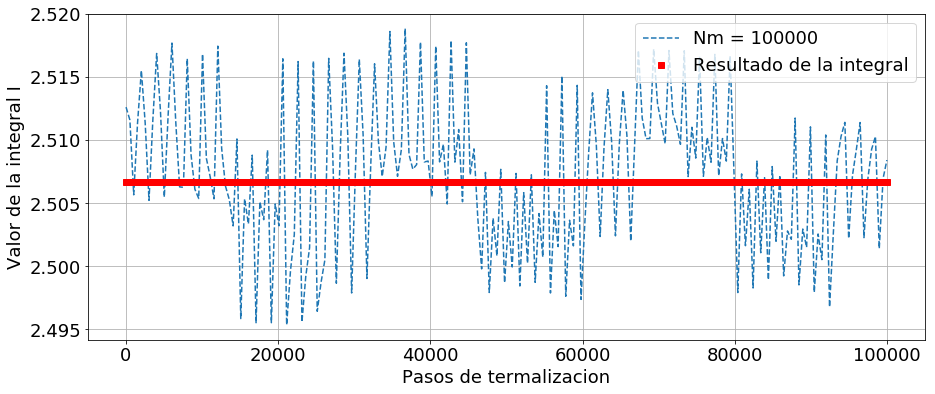

Esto tardó 22.505287170410156 segundos


In [4]:
# Acá vamos a hacer el punto 1b

t0 = time.time()

# Ahora tengo que ver el valor de la integral en función del tiempo de termalización y
# del tamaño del muestreo. Por tanto, los valores de Delta y de tiempo de descorrelacion los elijo
# yo en función de los datos anteriores
# El valor de la integral es sqrt(2pi)/N * Suma(Xi^2)

# Voy a usar el delta 2

for x in Muestreos1:
    dada = x.split("=")
    dede = dada[1].strip(".txt")
    if 2==float(dede):
        label = x
# ---------------------------------------------------------
# Con esto tomo el nombre del archivo con el Delta 2

Datos = ldata("Met1/{}".format(label))
Datos = [float(x) for x in Datos[0][0:len(Datos[0])-1]]

Termalizacion = np.linspace(10,100000,200)
Td = 10
Nmuestras = [10**j for j in range(2,6)]
DicNM = dict()
for nm in Nmuestras:
    DicNM[nm] = [[],[]]
    for term in Termalizacion:
        Xdatos = []
        for j in range(nm):
            Xdatos.append(Datos[int(term)+j*Td])
        Xarray = np.array(Xdatos)
        y = np.sqrt(2*math.pi)*(np.linalg.norm(Xarray)**2)/nm
        DicNM[nm][0].append(term)
        DicNM[nm][1].append(y)

A =np.linspace(0,100000,500)
B=[]
for i in range(len(A)):
    B.append(np.sqrt(math.pi*2))

for nm in DicNM.keys():    
    plt.figure(figsize=(15,6))
    plt.plot(DicNM[nm][0],DicNM[nm][1],"--",label = "Nm = {}".format(nm))
    plt.plot(A,B,"rs",label="Resultado de la integral")
    plt.grid()
    plt.rcParams.update({'font.size': 18})
    plt.xlabel("Pasos de termalizacion")
    plt.ylabel("Valor de la integral I")
    #plt.title("Valor de la integral I en funcion de la termalizacion y cantidad de muestras")
    plt.legend()
    plt.show()

Tiempo()

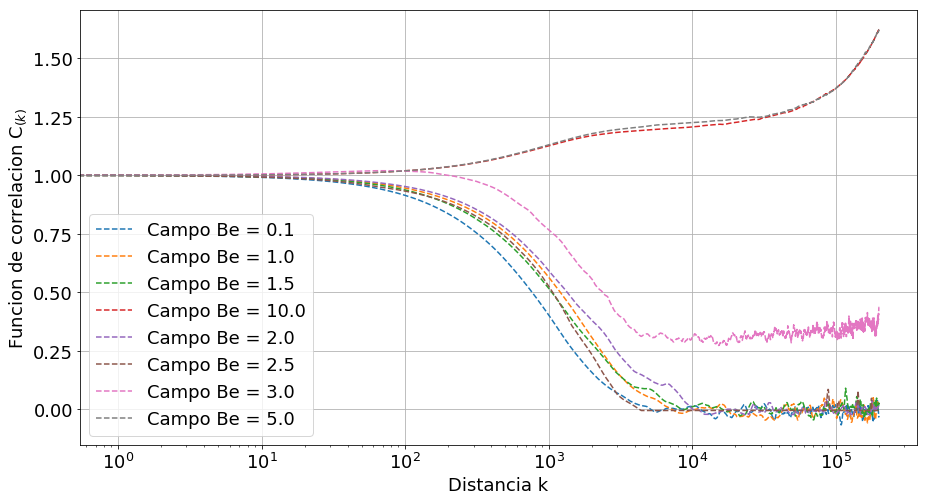

Esto tardó 20.86219310760498 segundos


In [7]:
t0 = time.time()

# Ahora viene el análisis de la correlacion
# Va a haber que hacer promedios. Hay que arremangarse
# Los archivos tienen la forma "Datos_Correlacion_Ising_Magnetismo_Medicion=med_Be=valor.txt"

Campob = dict()

for x in Labarcm2a:
    dada = x.split("=")
    dede = dada[2].strip(".txt")
    if float(dede) not in Campob.keys():
        Campob[float(dede)] = []

for j in Campob.keys():
    for x in Labarcm2a:
        dada = x.split("=")
        dede = dada[2].strip(".txt")
        if j==float(dede):
            Campob[j].append(x)

Dicprom2 = dict()
for j in Campob.keys():
    Tabla = []
    for label in Campob[j]:
        # Lee el archivo con los valores de pc para cada dimensión
        Datos = ldata("Met2a/{}".format(label))
        # Lo corrige para que Datos sea una lista con los valores de pc
        Datos2=[float(x) for x in Datos[0][0:len(Datos[0])-1]]
#         dada = label.split("=")
#         dede = dada[2].strip(".txt") # Este es el ancho del paso de aceptacion
#         d = float(dede)
        Tabla.append(Datos2)
    Dicprom2[j] = [[],[]]
    for l in range(len(Tabla[0])):
        A = []
        for m in range(len(Tabla)):
            A.append(Tabla[m][l])
        B = np.array(A)
        prom = np.mean(B)
        Dicprom2[j][0].append(l)
        Dicprom2[j][1].append(prom)

#------------------------------------------------------------------------
# Ahora me queda el gráfico de la correlación

plt.figure(figsize=(15,8))
for k in Dicprom2.keys():
    plt.semilogx(Dicprom2[k][0],Dicprom2[k][1],"--",label="Campo Be = {}".format(round(k,1)))
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.xlabel("Distancia k")
plt.ylabel("Funcion de correlacion C$_{(k)}$")
# plt.title("Correlacion del magnetismo en funcion de la distancia k")
plt.legend()
plt.show()


Tiempo()

In [8]:
# label = Labarcm2a[1]
# print(label)
# Datos = ldata("Met2a/{}".format(label))
# Datos2=[[] for j in range(len(Datos))]
# Datos2[0]=[float(x) for x in Datos[0][0:len(Datos[0])-1]]
# dada = label.split("=")
# dede = dada[2].strip(".txt") # Este es el ancho del paso de aceptacion
# d = float(dede)
# for j in range(1,len(Datos)):
#     Datos2[j] = [float(x) for x in Datos[j][0:len(Datos[j])-1]]

# print(Datos2[0][1])
# A = np.arange(0,len(Datos2[0][1::]))
# plt.figure(figsize=(15,6))
# plt.semilogx(A,Datos2[0][1::],"g--",label="Datos")
# plt.grid()
# plt.rcParams.update({'font.size': 18})
# plt.xlabel("k")
# plt.ylabel("Correlacion de la magnetizacion")
# # plt.title("")
# plt.legend()
# plt.show()
